## Loading and plotting vorticity and Okubo-Weiss parameter on a isopycnal level

### A minimal example

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

In [40]:
# Pick an isopycnal level number: isopycnals = [26.4, 26.6, 27.2, 27.4, 27.6, 27.8, 27.86] ;

isig = 5;


# pick a time between 2330 and 6690

time = 2540

it = time %10 # index in file
filetime = time  - it # file time

#############################
# Load vrt and ow from netcdf file

folder = '/home/datawork-lops-megatl/EDDY/gigatl3/iso/'
ncfile = folder + 'gigatl3_1h_isopycnal_section.' + ''.formar+ '.nc'

it=0
nc = Dataset(ncfile,'r')
rho_iso = nc.variables['isopycnal'][isig] # potential density
vrt = nc.variables['vrt'][it,isig,:,:] # relative vorticity
ow = nc.variables['ow'][it,isig,:,:] # Okubo-Weiss parameter 
nc.close()

#############################
# Load lon/lat from grid file

grdfile = folder + 'gigatl3_grd.nc'
grd = Dataset(grdfile,'r')
lon = grd.variables['lon_rho'][:]
lat = grd.variables['lat_rho'][:]
lon_psi = grd.variables['lon_psi'][:]
lat_psi = grd.variables['lat_psi'][:]
grd.close()


In [44]:
time = 2540

filetime = time % 10
time %10

0

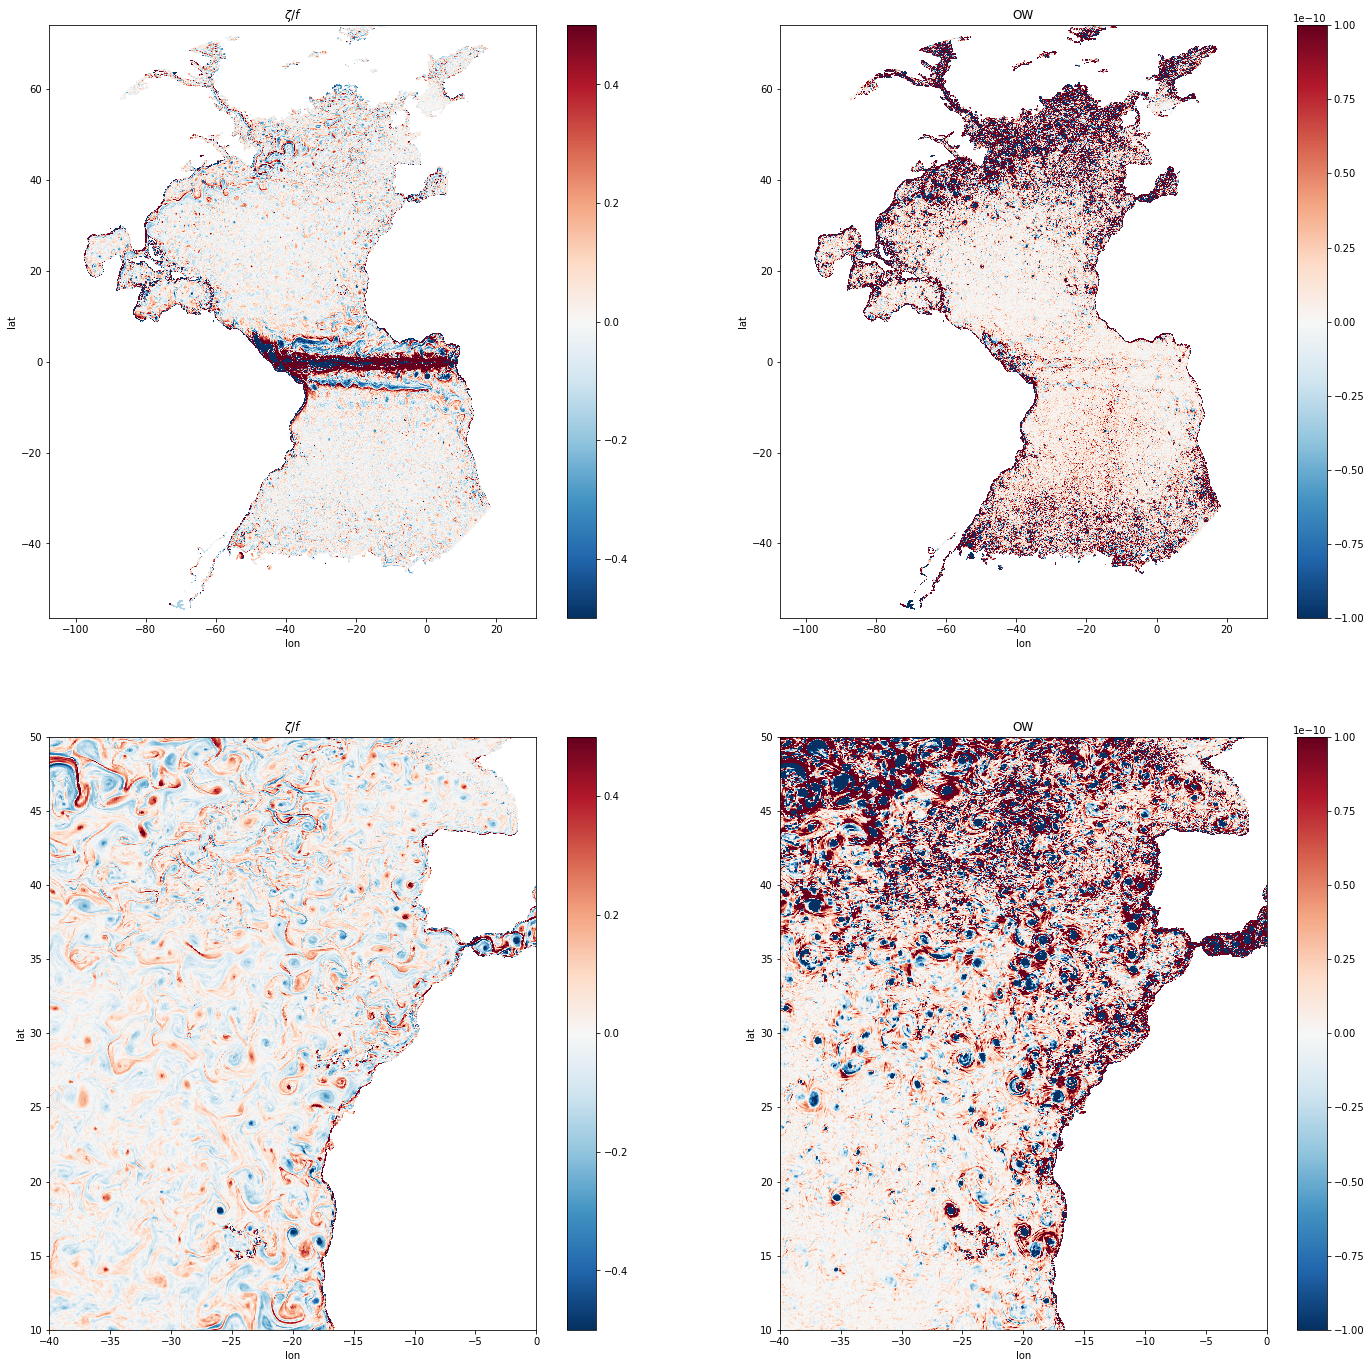

In [42]:
fig = plt.figure(figsize=(24.0,24.0))

#######
# Full Atlantic
#######

ax1 = plt.subplot(2,2,1); plt.title(r'$\zeta/f$')
plt.pcolormesh(lon_psi,lat_psi,vrt,vmin=-.5,vmax=.5,cmap = 'RdBu_r'); plt.colorbar()
plt.xlabel('lon'); plt.ylabel('lat'); 

ax2 = plt.subplot(2,2,2); plt.title('OW')
plt.pcolormesh(lon,lat,ow,vmin=-1.e-10,vmax=1.e-10,cmap = 'RdBu_r'); plt.colorbar()
plt.xlabel('lon'); plt.ylabel('lat'); 

#######
# Zoom
#######

ax3 = plt.subplot(2,2,3);plt.title(r'$\zeta/f$')
plt.pcolormesh(lon_psi,lat_psi,vrt,vmin=-.5,vmax=.5,cmap = 'RdBu_r'); plt.colorbar()
plt.axis([-40,0,10,50]); plt.xlabel('lon'); plt.ylabel('lat'); 

ax4 = plt.subplot(2,2,4);
plt.title('OW')
plt.pcolormesh(lon,lat,ow,vmin=-1.e-10,vmax=1.e-10,cmap = 'RdBu_r'); plt.colorbar()
plt.axis([-40,0,10,50]); plt.xlabel('lon'); plt.ylabel('lat'); 
#######

plt.savefig('test.png', dpi=300)